In [75]:
import numpy as np
import pandas as pd
from autoviz.AutoViz_Class import AutoViz_Class
from autoviz import data_cleaning_suggestions
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from catboost import CatBoostClassifier, Pool
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
from imblearn.over_sampling import SMOTENC
import sklearn.metrics as skm
import joblib

## EDA ##

In [76]:
df = pd.read_csv(r"C:\Users\Dell\Desktop\ML course\Income_Inequality_Prediction_Project2\Dataset\Inequality Prediction Dataset.csv")

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209499 entries, 0 to 209498
Data columns (total 43 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              209499 non-null  object 
 1   age                             209499 non-null  int64  
 2   gender                          209499 non-null  object 
 3   education                       209499 non-null  object 
 4   class                           104254 non-null  object 
 5   education_institute             13302 non-null   object 
 6   marital_status                  209499 non-null  object 
 7   race                            209499 non-null  object 
 8   is_hispanic                     209499 non-null  object 
 9   employment_commitment           209499 non-null  object 
 10  unemployment_reason             6520 non-null    object 
 11  employment_stat                 209499 non-null  int64  
 12  wage_per_hour   

In [78]:
df.shape

(209499, 43)

In [79]:
# Includes all data types except int and float
df.describe(include=['O']).T

,count,unique,top,freq
ID,209499,209499,ID_TZ0000,1
gender,209499,2,Female,108784
education,209499,17,High school graduate,50627
class,104254,8,Private,75617
education_institute,13302,2,High school,7247
marital_status,209499,7,Never married,90723
race,209499,5,White,175709
is_hispanic,209499,10,All other,180404
employment_commitment,209499,8,Children or Armed Forces,129789
unemployment_reason,6520,5,Other job loser,2242


In [80]:
data_cleaning_suggestions(df)

    All variables classified into correct types.


,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
ID,object,0.000000,100,,,Possible ID column: drop before modeling step.
age,int64,0.000000,0,0.000000,90.000000,No issue
gender,object,0.000000,0,,,No issue
education,object,0.000000,0,,,"4 rare categories: [' 1st 2nd 3rd or 4th grade', ' Prof school degree (MD DDS DVM LLB JD)', ' Doctorate degree(PhD EdD)', ' Less than 1st grade']. Group them into a single category or drop the categories."
class,object,50.236517,0,,,"105245 missing values. Impute them with mean, median, mode, or a constant value such as 123., 2 rare categories: [' Never worked', ' Without pay']. Group them into a single category or drop the categories., Mixed dtypes: has 2 different data types: float, object,"
education_institute,object,93.650566,0,,,"Possible Zero-variance or low information colum: drop before modeling step., 196197 missing values. Impute them with mean, median, mode, or a constant value such as 123."
marital_status,object,0.000000,0,,,"2 rare categories: [' Married-spouse absent', ' Married-A F spouse present']. Group them into a single category or drop the categories."
race,object,0.000000,0,,,No issue
is_hispanic,object,0.000000,0,,,"4 rare categories: [' Cuban', ' NA', ' Chicano', ' Do not know']. Group them into a single category or drop the categories."
employment_commitment,object,0.000000,0,,,"3 rare categories: [' PT for econ reasons usually PT', ' Unemployed part- time', ' PT for econ reasons usually FT']. Group them into a single category or drop the categories."


,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
ID,object,0.000000,100,,,Possible ID column: drop before modeling step.
age,int64,0.000000,0,0.0,90.0,No issue
gender,object,0.000000,0,,,No issue
education,object,0.000000,0,,,"4 rare categories: [' 1st 2nd 3rd or 4th grade', ' Prof school degree (MD DDS DVM LLB JD)', ' Doctorate degree(PhD EdD)', ' Less than 1st grade']. Group them into a single category or drop the categories."
class,object,50.236517,0,,,"105245 missing values. Impute them with mean, median, mode, or a constant value such as 123., 2 rare categories: [' Never worked', ' Without pay']. Group them into a single category or drop the categories., Mixed dtypes: has 2 different data types: float, object,"
education_institute,object,93.650566,0,,,"Possible Zero-variance or low information colum: drop before modeling step., 196197 missing values. Impute them with mean, median, mode, or a constant value such as 123."
marital_status,object,0.000000,0,,,"2 rare categories: [' Married-spouse absent', ' Married-A F spouse present']. Group them into a single category or drop the categories."
race,object,0.000000,0,,,No issue
is_hispanic,object,0.000000,0,,,"4 rare categories: [' Cuban', ' NA', ' Chicano', ' Do not know']. Group them into a single category or drop the categories."
employment_commitment,object,0.000000,0,,,"3 rare categories: [' PT for econ reasons usually PT', ' Unemployed part- time', ' PT for econ reasons usually FT']. Group them into a single category or drop the categories."


In [81]:
df.drop(columns = ['ID','class','unemployment_reason','is_labor_union','education_institute','occupation_code_main','under_18_family','veterans_admin_questionnaire','migration_prev_sunbelt','residence_1_year_ago','old_residence_reg','old_residence_state','industry_code','occupation_code'], inplace = True)

In [82]:
df = df.replace(to_replace=[' ?',' Do not know',' NA'], value=np.nan)

In [83]:
index_drop = df[df.duplicated()].index
df.drop(index = index_drop, inplace = True)
df.duplicated().sum()

0

In [84]:
df.shape

(204946, 29)

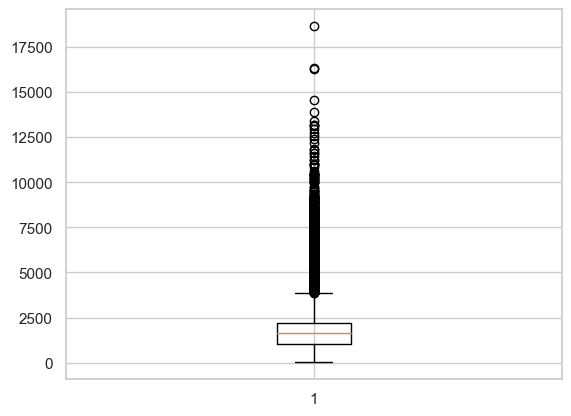

In [85]:
# Capping the outliers to the lower or upper bound
plt.boxplot(df['importance_of_record'])
index_val = df[df['importance_of_record']> 3871.77].index
df['importance_of_record'][index_val] = 5000

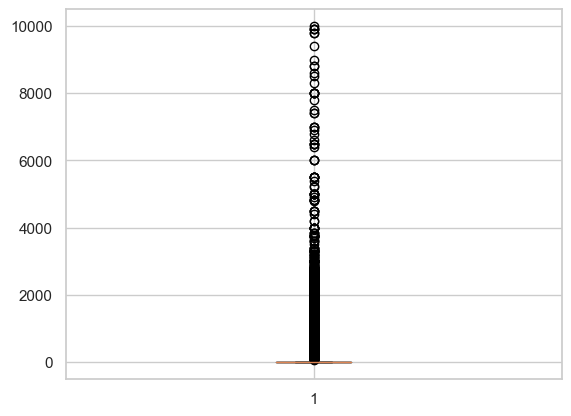

In [86]:
plt.boxplot(df['wage_per_hour'])
index_val = df['wage_per_hour'][df['wage_per_hour'] > 2000].index
df['wage_per_hour'][index_val] = 2000

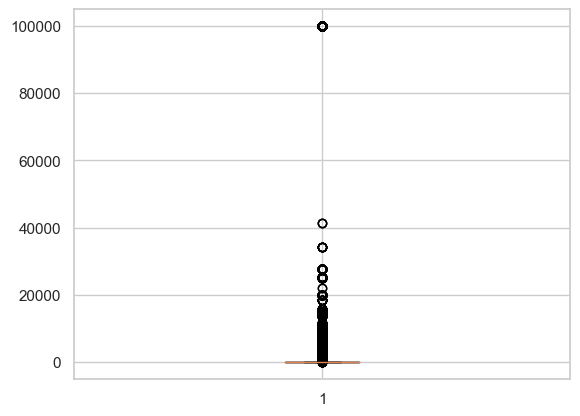

In [87]:
plt.boxplot(df['gains'])
index_val = df['gains'][df['gains']> 10000].index
df['gains'][index_val] = 10000

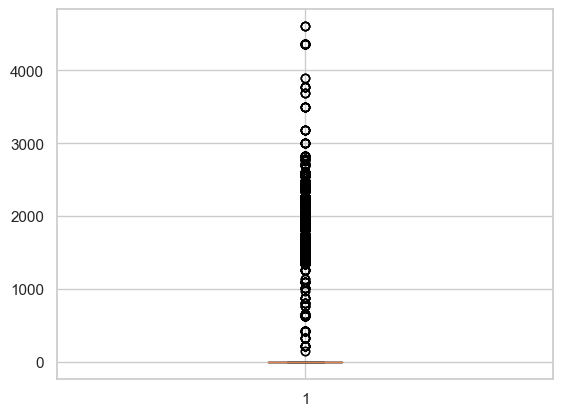

In [88]:
plt.boxplot(df['losses'])
index_val = df['losses'][df['losses']> 500].index
df['losses'][index_val] = 500

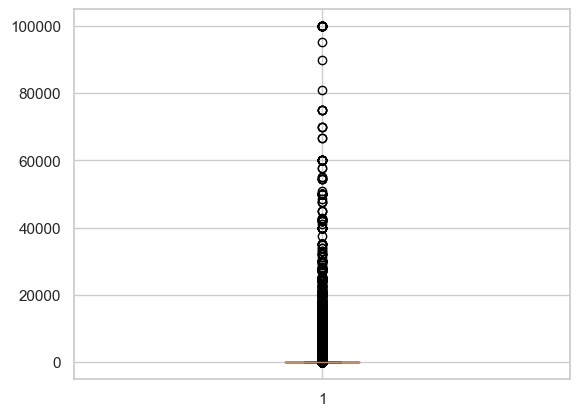

In [89]:
plt.boxplot(df['stocks_status'])
index_val = df['stocks_status'][df['stocks_status']>20000].index
df['stocks_status'][index_val] = 20000

In [90]:
# Treating rare categories
index_val = df['education'][df['education'].isin([' Less than 1st grade',' 1st 2nd 3rd or 4th grade']) == True].index
df['education'][index_val] = ' 5th or 6th grade'

index_val = df['education'][df['education'].isin([' Doctorate degree(PhD EdD)',' Prof school degree (MD DDS DVM LLB JD)']) == True].index
df['education'][index_val] = ' Masters degree(MA MS MEng MEd MSW MBA)'
df['education'].unique()

array([' High school graduate', ' 12th grade no diploma', ' Children',
       ' Bachelors degree(BA AB BS)', ' 7th and 8th grade', ' 11th grade',
       ' 9th grade', ' Masters degree(MA MS MEng MEd MSW MBA)',
       ' 10th grade', ' Associates degree-academic program',
       ' 5th or 6th grade', ' Some college but no degree',
       ' Associates degree-occup /vocational'], dtype=object)

In [91]:
index_val = df['marital_status'][df['marital_status'].isin([' Married-spouse absent', ' Married-A F spouse present'])].index
df['marital_status'][index_val] = ' Married-civilian spouse present'
index_val = df['marital_status'][df['marital_status'] == ' Married-civilian spouse present'].index
df['marital_status'][index_val] = 'Married'
df['marital_status'].unique()


array([' Widowed', ' Never married', 'Married', ' Divorced', ' Separated'],
      dtype=object)

In [92]:
index_val = df['employment_commitment'][df['employment_commitment'].isin([' PT for econ reasons usually PT', ' Unemployed part- time', ' PT for econ reasons usually FT'])].index
df['employment_commitment'][index_val] = 'Part-time schedules'
df['employment_commitment'].unique()

array([' Not in labor force', ' Children or Armed Forces',
       ' Full-time schedules', 'Part-time schedules',
       ' Unemployed full-time', ' PT for non-econ reasons usually FT'],
      dtype=object)

In [93]:
index_val = df['industry_code_main'][df['industry_code_main'].isin([' Entertainment', ' Utilities and sanitary services', ' Communications', ' Private household services', ' Mining', ' Forestry and fisheries', ' Armed Forces'])].index
df['industry_code_main'][index_val] = ' Other professional services'
df['industry_code_main'].unique()

index_val = df['industry_code_main'][df['industry_code_main'] == ' Not in universe or children'].index
df['industry_code_main'][index_val] = 'Unemployed or children'
df['industry_code_main'].unique()

array(['Unemployed or children', ' Hospital services', ' Retail trade',
       ' Finance insurance and real estate',
       ' Manufacturing-nondurable goods', ' Transportation',
       ' Business and repair services', ' Medical except hospital',
       ' Education', ' Construction', ' Manufacturing-durable goods',
       ' Public administration', ' Agriculture',
       ' Other professional services',
       ' Personal services except private HH', ' Wholesale trade',
       ' Social services'], dtype=object)

In [94]:
# Chicano is same as Mexican-American ad Cuba is part of CA
index_val = df['is_hispanic'][df['is_hispanic'] == ' Chicano'].index
df['is_hispanic'][index_val] = ' Mexican-American'

index_val = df['is_hispanic'][df['is_hispanic'] == ' Cuban'].index
df['is_hispanic'][index_val] = ' Central or South American'
df['is_hispanic'].unique()
df.drop(columns = 'household_stat', inplace = True)

In [95]:
# household_stat is a Replica of household_summary and too many categories, hence removed it
index_val = df['household_summary'][df['household_summary'].isin([' Child under 18 never married',' Child under 18 ever married'])].index
df['household_summary'][index_val] = 'Child under 18'
df['household_summary'].unique()

array([' Householder', ' Child 18 or older', 'Child under 18',
       ' Spouse of householder', ' Nonrelative of householder',
       ' Other relative of householder',
       ' Group Quarters- Secondary individual'], dtype=object)

In [96]:
index_val = df['citizenship'][df['citizenship'].isin([' Native- Born abroad of American Parent(s)', ' Native- Born in Puerto Rico or U S Outlying'])].index
df['citizenship'][index_val] = 'Native'
df['citizenship'].unique()

array(['Native', ' Foreign born- Not a citizen of U S ',
       ' Foreign born- U S citizen by naturalization'], dtype=object)

In [97]:
df.drop(columns = ['country_of_birth_own','country_of_birth_father','country_of_birth_mother','migration_code_change_in_msa','migration_code_move_within_reg','migration_code_change_in_reg'], inplace = True)

In [110]:
df.isnull().sum()

age                      0
gender                   0
education                0
marital_status           0
race                     0
is_hispanic              0
employment_commitment    0
employment_stat          0
wage_per_hour            0
working_week_per_year    0
industry_code_main       0
total_employed           0
household_summary        0
vet_benefit              0
tax_status               0
gains                    0
losses                   0
stocks_status            0
citizenship              0
mig_year                 0
importance_of_record     0
income_above_limit       0
dtype: int64

In [111]:
df.shape

(202434, 22)

In [100]:
imp = SimpleImputer(strategy = 'most_frequent')
df_copy = df.copy()
df = pd.DataFrame(imp.fit_transform(df),columns = df.columns).astype(df.dtypes.to_dict())
df.isnull().sum()

age                      0
gender                   0
education                0
marital_status           0
race                     0
is_hispanic              0
employment_commitment    0
employment_stat          0
wage_per_hour            0
working_week_per_year    0
industry_code_main       0
total_employed           0
household_summary        0
vet_benefit              0
tax_status               0
gains                    0
losses                   0
stocks_status            0
citizenship              0
mig_year                 0
importance_of_record     0
income_above_limit       0
dtype: int64

In [101]:
duplicate_rows = df.duplicated()
duplicated_index = df[df.duplicated() == True].index
df = df.drop(index = duplicated_index)
df.duplicated().sum()

0

In [102]:
for col in df.describe(include = ['O']):
    df[col] = df[col].astype('category')


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202434 entries, 0 to 204945
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   age                    202434 non-null  int64   
 1   gender                 202434 non-null  category
 2   education              202434 non-null  category
 3   marital_status         202434 non-null  category
 4   race                   202434 non-null  category
 5   is_hispanic            202434 non-null  category
 6   employment_commitment  202434 non-null  category
 7   employment_stat        202434 non-null  int64   
 8   wage_per_hour          202434 non-null  int64   
 9   working_week_per_year  202434 non-null  int64   
 10  industry_code_main     202434 non-null  category
 11  total_employed         202434 non-null  int64   
 12  household_summary      202434 non-null  category
 13  vet_benefit            202434 non-null  int64   
 14  tax_status          

((202434, 21), (202434,))

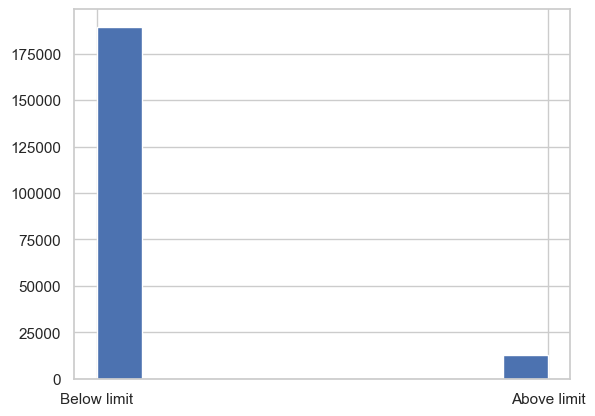

In [113]:
# Target variable balancing
y = df['income_above_limit']
plt.hist(y)
X = df.drop(columns = 'income_above_limit')
y_or = y.copy()
X_or = X.copy()

X.shape, y.shape

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state =42)
st = SMOTENC(categorical_features = [1,2,3,4,5,6,10,12,14,18])
X_train.shape, y_train.shape


((141703, 21), (141703,))

In [115]:
X_new_train, y_new_train = st.fit_resample(X_train, y_train)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265170 entries, 0 to 265169
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   age                    265170 non-null  int64   
 1   gender                 265170 non-null  category
 2   education              265170 non-null  category
 3   marital_status         265170 non-null  category
 4   race                   265170 non-null  category
 5   is_hispanic            265170 non-null  category
 6   employment_commitment  265170 non-null  category
 7   employment_stat        265170 non-null  int64   
 8   wage_per_hour          265170 non-null  int64   
 9   working_week_per_year  265170 non-null  int64   
 10  industry_code_main     265170 non-null  category
 11  total_employed         265170 non-null  int64   
 12  household_summary      265170 non-null  category
 13  vet_benefit            265170 non-null  int64   
 14  tax_status          

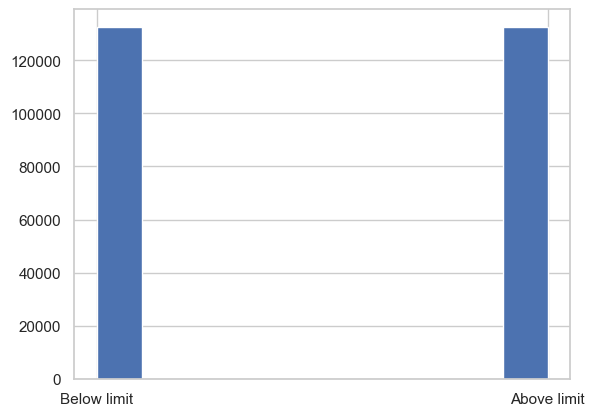

In [116]:
plt.hist(y_new_train)
X_new_train.info()

## Baseline Modeling ##

In [117]:
categorical_features = X_new_train.select_dtypes(include = 'category').columns
categorical_features = X_new_train.columns.get_indexer(categorical_features)
categorical_features


array([ 1,  2,  3,  4,  5,  6, 10, 12, 14, 18], dtype=int64)

In [118]:
# Pool creation
train_pool = Pool(X_new_train,y_new_train,categorical_features)
test_pool = Pool(X_test,y_test, categorical_features)

# If model stops before iterating up to the mentioned, then model is overfitting
cb = CatBoostClassifier(iterations=500,max_depth=5,learning_rate=0.05,random_seed = 42,verbose = False)
cb.fit(X_new_train,y_new_train, eval_set = test_pool, cat_features = categorical_features, use_best_model= True, early_stopping_rounds=10, plot = True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [119]:
print ('BASELINE MODELING OF CATBOOST', '\n', skm.classification_report(y_test, cb.predict(X_test)))

BASELINE MODELING OF CATBOOST 
               precision    recall  f1-score   support

 Above limit       0.39      0.69      0.50      3879
 Below limit       0.98      0.93      0.95     56852

    accuracy                           0.91     60731
   macro avg       0.69      0.81      0.73     60731
weighted avg       0.94      0.91      0.92     60731



In [130]:
X_test.iloc[0].values

array([78, ' Male', ' 7th and 8th grade', 'Married', ' Black',
       ' All other', ' Not in labor force', 0, 0, 0,
       'Unemployed or children', 0, ' Householder', 2, ' Nonfiler', 0, 0,
       0, 'Native', 95, 3403.54], dtype=object)

In [134]:
# Encoding target for xgboost, even though it supports categorical (w/o encoding) only for df, and not df.index.values or arrays
label = LabelEncoder()
y_train_encoded = label.fit_transform(y_new_train)
y_test_encoded = label.fit_transform(y_test)
encode = ce.OrdinalEncoder()
X_train_encoded = encode.fit_transform(X_new_train)
X_test_encoded = encode.fit_transform(X_test)

# enable_categorical is available only for hist and approx tree methods, approx gave slightly better precision and recall than hist
xgb = XGBClassifier(tree_method = 'approx', enable_categorical = True)
xgb.fit(X_train_encoded,y_train_encoded,eval_metric = 'logloss')

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=True,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [135]:
print ('BASELINE MODELING OF XGBOOST', '\n',skm.classification_report(y_test_encoded, xgb.predict(X_test_encoded)))

BASELINE MODELING OF XGBOOST 
               precision    recall  f1-score   support

           0       0.14      0.41      0.21      3879
           1       0.95      0.83      0.89     56852

    accuracy                           0.80     60731
   macro avg       0.55      0.62      0.55     60731
weighted avg       0.90      0.80      0.84     60731



## Model Selection and Dimensionality Reduction ##

[ 5.77046165  4.07104467  8.38952057  1.21112139  1.53106098  0.824743
 27.18966428  1.24473997  0.52919038  4.97749707  2.42082742  2.50886247
  3.5300791   1.00850587  4.46963094  2.40931063  0.43845247  2.13135148
  0.63278261 23.87668098  0.83447207] Index(['age', 'gender', 'education', 'marital_status', 'race', 'is_hispanic',
       'employment_commitment', 'employment_stat', 'wage_per_hour',
       'working_week_per_year', 'industry_code_main', 'total_employed',
       'household_summary', 'vet_benefit', 'tax_status', 'gains', 'losses',
       'stocks_status', 'citizenship', 'mig_year', 'importance_of_record'],
      dtype='object')


{5.770461646263599: 'age',
 4.071044674629218: 'gender',
 8.389520573808136: 'education',
 1.2111213870114472: 'marital_status',
 1.531060975396971: 'race',
 0.8247430030312548: 'is_hispanic',
 27.18966427973245: 'employment_commitment',
 1.2447399748593797: 'employment_stat',
 0.5291903822940062: 'wage_per_hour',
 4.9774970650412005: 'working_week_per_year',
 2.4208274174283813: 'industry_code_main',
 2.5088624698045336: 'total_employed',
 3.5300791011948682: 'household_summary',
 1.0085058675785394: 'vet_benefit',
 4.469630940300445: 'tax_status',
 2.409310625566591: 'gains',
 0.43845247413359467: 'losses',
 2.131351479372921: 'stocks_status',
 0.6327826067608135: 'citizenship',
 23.876680981597588: 'mig_year',
 0.8344720741941002: 'importance_of_record'}

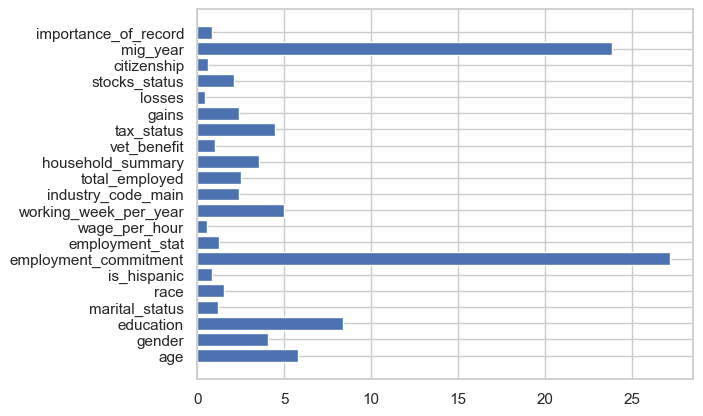

In [147]:
print (cb.feature_importances_, X_train_encoded.columns)
plt.barh(X_train_encoded.columns,cb.feature_importances_)
dict1 = dict(zip(cb.feature_importances_,X_train_encoded.columns))
dict1

In [152]:
important_features = ['age','gender','education','employment_commitment','working_week_per_year',
                      'household_summary','tax_status','mig_year']
X_final = X[important_features]
index_drop = X_final[X_final.duplicated()].index
X_final.drop(index = index_drop, inplace = True)
y.drop(index = index_drop, inplace = True)
X_final.shape

(57968, 8)

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X_final,y,test_size = 0.3, random_state = 42)

In [155]:
X_train.info()
categorical_features = [1,2,3,5,6]
st = SMOTENC(categorical_features)
X_new_train, y_new_train = st.fit_resample(X_train, y_train)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40577 entries, 113477 to 196908
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   age                    40577 non-null  int64   
 1   gender                 40577 non-null  category
 2   education              40577 non-null  category
 3   employment_commitment  40577 non-null  category
 4   working_week_per_year  40577 non-null  int64   
 5   household_summary      40577 non-null  category
 6   tax_status             40577 non-null  category
 7   mig_year               40577 non-null  int64   
dtypes: category(5), int64(3)
memory usage: 1.4 MB


(array([38508.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 38508.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

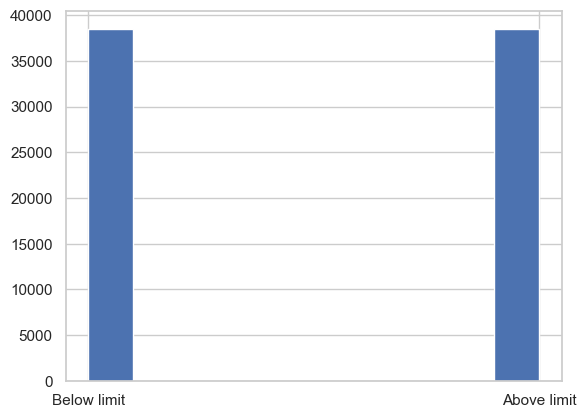

In [156]:
plt.hist(y_new_train)

In [157]:
# Pool creation
train_pool = Pool(X_new_train,y_new_train,categorical_features)
test_pool = Pool(X_test,y_test, categorical_features)

# If model stops before iterating up to the mentioned, then model is overfitting
cb = CatBoostClassifier(iterations=500,max_depth=5,learning_rate=0.05,random_seed = 42,verbose = False)
cb.fit(X_new_train,y_new_train, eval_set = test_pool, cat_features = categorical_features, use_best_model= True, early_stopping_rounds=10, plot = True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [176]:
print ('MODELING OF CATBOOST AFTER FEATURE REDUCTION', '\n', skm.classification_report(y_test, cb.predict(X_test)))

MODELING OF CATBOOST AFTER FEATURE REDUCTION 
               precision    recall  f1-score   support

 Above limit       0.21      0.76      0.32       887
 Below limit       0.98      0.84      0.91     16504

    accuracy                           0.84     17391
   macro avg       0.60      0.80      0.62     17391
weighted avg       0.94      0.84      0.88     17391



## Tuning ##

In [160]:
# Increase the accuracy by taking the default paramas: no. of iterations = 1000, depth = 6
cb_tuned = CatBoostClassifier(random_seed = 42,verbose = False)
cb_tuned.fit(X_new_train,y_new_train, eval_set = test_pool, cat_features = categorical_features, use_best_model= True, early_stopping_rounds=10, plot = True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [185]:
cb_tuned.get_all_params()['depth']

6

In [187]:
# Case of overfitting as model is performing well on train but not test data, hence penalize it
# Decrease learning rate, depth and increase the regularization paramters
cb_tuned = CatBoostClassifier(random_seed = 42,verbose = False, learning_rate=0.05, l2_leaf_reg=5,depth = 5)
cb_tuned.fit(X_new_train,y_new_train, eval_set = test_pool, cat_features = categorical_features, use_best_model= True, early_stopping_rounds=10, plot = True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [161]:
print ('CATBOOST AFTER 1st TUNING', '\n', skm.classification_report(y_test,cb_tuned.predict(X_test)))

CATBOOST AFTER 1st TUNING 
               precision    recall  f1-score   support

 Above limit       0.21      0.71      0.33       887
 Below limit       0.98      0.86      0.92     16504

    accuracy                           0.85     17391
   macro avg       0.60      0.79      0.62     17391
weighted avg       0.94      0.85      0.89     17391



In [189]:
print ('CATBOOST AFTER 2nd TUNING', '\n', skm.classification_report(y_test,cb_tuned.predict(X_test)))

CATBOOST AFTER 2nd TUNING 
               precision    recall  f1-score   support

 Above limit       0.21      0.74      0.33       887
 Below limit       0.98      0.85      0.91     16504

    accuracy                           0.84     17391
   macro avg       0.60      0.80      0.62     17391
weighted avg       0.94      0.84      0.88     17391



In [190]:
# No improving in log loss, reverting to the original values of cb_tuned
cb_final = CatBoostClassifier(random_seed = 42,verbose = False)
cb_final.fit(X_new_train,y_new_train, eval_set = test_pool, cat_features = categorical_features, use_best_model= True, early_stopping_rounds=10, plot = True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [192]:
cb_final.predict(X_test.iloc[0])

'Below limit'

## Saving the model ##

In [194]:
joblib.dump(cb_final,'catboost.joblib')
model = joblib.load('catboost.joblib')

In [202]:
model.predict(X_test)

array(['Below limit', 'Below limit', 'Below limit', ..., 'Below limit',
       'Below limit', 'Below limit'], dtype=object)

In [210]:
# Sample streamlit checking
model.predict([0,' Male',' Bachelors degree(BA AB BS)',' Children or Armed Forces',1,' Other relative of householder',
' Joint both under 65', 94])

'Below limit'

In [209]:
model.predict([29,' Female',' Masters degree(MA MS MEng MEd MSW MBA)',' Full-time schedules',52,
' Householder',' Single', 94])

'Above limit'